In [1]:
!apt-get update

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://security.ubuntu.com/ubuntu 

In [2]:
# Spark for Python
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 41 kB/s 
     |████████████████████████████████| 199 kB 46.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845514 sha256=238d8784a88ccf077a0fa70ae588628676d9c4831fc6450b27af523337cf8f6d
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [3]:
# create a spark dataframe with 3 numeric columns and one categorical (colour)
import random
from pyspark.sql import SparkSession,SQLContext
#spark = SparkSession.builder.appName("Basics").getOrCreate()
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc=spark.sparkContext
sqlContext = SQLContext(sc)


A = [random.normalvariate(0,1) for i in range(100)]
B = [random.normalvariate(1,2) for i in range(100)]
C = [random.normalvariate(-1,0.5) for i in range(100)]
col = [random.choice(['#e41a1c', '#377eb8','#4eae4b']) for i in range(100)]

df = sqlContext.createDataFrame(zip(A,B,C,col), ["A","B","C","col"])

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [4]:
df.show()

+--------------------+-------------------+--------------------+-------+
|                   A|                  B|                   C|    col|
+--------------------+-------------------+--------------------+-------+
| -0.4571885408180275|-0.9453856815373056|   -1.54974476933898|#4eae4b|
|  1.0646627589610933| 3.4988550182919127| -1.1463276874381074|#e41a1c|
|-0.04851329605993...|0.04941669061717313|  -1.972847370886677|#4eae4b|
|  1.0451817498432898| 0.7892329206249702| -1.8807820785943363|#4eae4b|
| -0.7437387524444619|-1.0171560864671423| -1.1579149139729723|#4eae4b|
|  0.4704601655955103| 0.5591829646397581| -1.5820773587366315|#e41a1c|
| 0.49538868071384323| 1.0302696759183727| -0.7809639614578107|#4eae4b|
|  0.5499005254266727| 2.1063479736914816| -0.9063129759051082|#e41a1c|
| 0.37624215585669624|-0.9883883818841577| -0.8330539467238797|#e41a1c|
|-0.19413951150735476|  2.751247707301264| -1.1862831954822353|#377eb8|
| -0.6748899642292597| 1.5028333894307258| -1.2392794211138138|#

In [5]:
# convert to pandas and plot
pdf = df.toPandas()

In [6]:
pdf.head()

,A,B,C,col
0,-0.457189,-0.945386,-1.549745,#4eae4b
1,1.064663,3.498855,-1.146328,#e41a1c
2,-0.048513,0.049417,-1.972847,#4eae4b
3,1.045182,0.789233,-1.880782,#4eae4b
4,-0.743739,-1.017156,-1.157915,#4eae4b


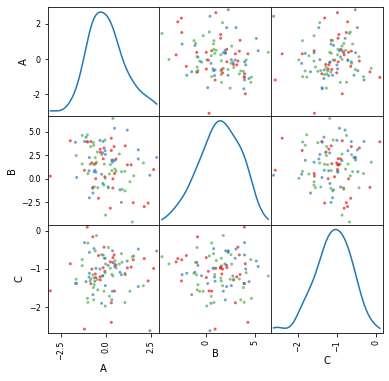

In [7]:
import pandas as pd


stuff = pd.plotting.scatter_matrix(pdf, alpha=0.7, figsize=(6, 6), diagonal='kde', color=pdf.col)

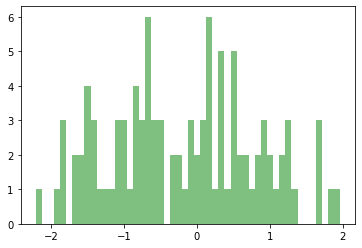

In [8]:
import random
import matplotlib.pyplot as plt

# create an RDD of 100 random numbers
x = [random.normalvariate(0,1) for i in range(100)]
rdd = sc.parallelize(x)

# plot data in RDD - use .collect() to bring data to local
num_bins = 50
n, bins, patches = plt.hist(rdd.collect(), num_bins, facecolor='green', alpha=0.5)